In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
import os
from tqdm import tqdm

import pandas as pd
import numpy as np

def generate_combinations(alphabet, k):
    if k == 0: return ['']
        
    combinations = []
    for char in alphabet:
        for suffix in generate_combinations(alphabet, k - 1):
            combinations.append(char + suffix)
    
    return combinations

In [3]:
k = 4
set_kmer = generate_combinations(alphabet=['A', 'C', 'G', 'T'], k=k)
set_type = {kmer: np.float16 for kmer in set_kmer}

dfData = pd.read_csv(f'data/DATA_benA_species_{k}mer.csv', dtype=set_type)

In [4]:
dfTemp = dfData[dfData['Species'].isin(['Aspergillus flavus', 'Aspergillus fumigatus', 'Aspergillus nomiae'])]

In [5]:
X = dfTemp.drop(['Unnamed: 0', 'Genus', 'Species'], axis=1)
y = dfTemp['Species']

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

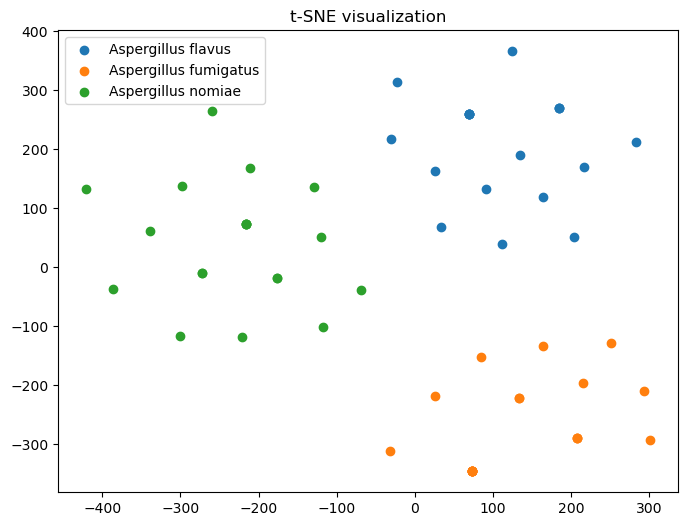

In [18]:
plt.figure(figsize=(8, 6))

for group in y.unique():
    idx = y == group
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=group)

plt.title('t-SNE visualization')
plt.legend()
plt.show()

In [24]:
dfData = pd.read_csv(f'data/DATA_ITS_species_{k}mer.csv', dtype=set_type)

In [29]:
dfTemp = dfData[dfData['Species'].isin(['Aspergillus_flavus', 'Aspergillus_fumigatus', 'Aspergillus_nomiae'])]

In [30]:
X = dfTemp.drop(['Genus', 'Species'], axis=1)
y = dfTemp['Species']

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

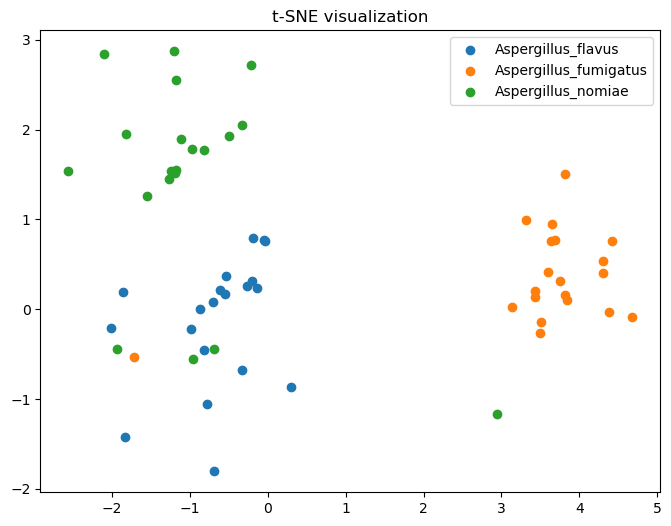

In [32]:
plt.figure(figsize=(8, 6))

for group in y.unique():
    idx = y == group
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=group)

plt.title('t-SNE visualization')
plt.legend()
plt.show()